[Website Link](https://kaylafortson.github.io)

# Analysis of School Shootings
Kayla Fortson and Torri Green

# Project Datasets

The first dataset we have chosen is School Shootings since Columbine. This data set features data collected by The Washington Post. This data is collected through multiple sources such as: Nexis, news articles, open-source databases, law enforcement reports, information from school websites, and calls to schools and police departments. In order for the shooting to have been included in this database it must have taken place on campus immediately before, during, or right after classes took place. This database excludes colleges and universities. There are a total of 338 shootings documented in this dataset. This dataset is critical because it involves the loss of innocent lives and can give us insightful knowledge to bring awareness to this unimaginable terror. We would like to examine the frequencies, demographics, and trends of this data. The data set includes information such as the school name, district ID and name, date and time of shooting, location, school type, enrollment, count of victims, and information about the shooter and their weapon. Further information of this data set can be found [here](https://github.com/washingtonpost/data-school-shootings.git)

The second dataset is collected from the National Center for Education Statistics. “The Common Core of Data (CCD) is the Department of Education’s primary database on public elementary and secondary education in the United States. CCD is a comprehensive, annual, national database of all public elementary and secondary schools and school districts.” For this project we used the Elementary/Secondary Information System (EISi), which is an NCES web application that allows its users to formulate data tables. Therefore, we matched information for this dataset to our former dataset with schools that experienced school shootings. This data set features all of the schools within school districts that experienced a shooting for that year. For example, for the Columbine shooting in 1999, all of Jefferson County’s schools will be included in the data (if available). Within the schools that have not experienced school shootings we have a total of 22,934 schools and we removed any schools that experienced shootings to avoid duplicate data with our other dataset. We also removed all virtual schools. Some columns include but are not limited to: school name, district name, city, state, county,  school type, race, and enrollment. Further information regarding this data set can be found [here](https://nces.ed.gov/ccd/elsi/) 


# Project Goals

Utilizing these datasets, we hope to bring further awareness to such horrendous events. In other words, by analyzing this data efficiently we can better understand how school shootings take place, how they unfold, the demographics and trends of the data, and more. We can also compare such data to schools that have not experienced shootings. These observations can prove critical to inferring answers to questions that can save lives in the future. For example, what areas are higher risk to school shootings? We will infer the answers to questions regarding the frequencies, locations, and demographics behind school shootings and those that have not experienced shootings. 


# Collaboration Plan 

The plan for our project is to meet in person once a week. In the meantime, progress can be made on our project virtually by using Google colab to work together as well as a shared Github repository. 


# ETL


First we import all of the libaries we need.

In [156]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Shootings Dataset

Now we will read in and tidy our dataset of school shootings so that we can do some analysis later.

In [157]:
shootings_df = pd.read_csv('https://raw.githubusercontent.com/KaylaFortson/KaylaFortson.github.io/main/datasets/school-shootings-data.csv', encoding='ISO-8859-1')

In [158]:
shootings_df.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,killed,injured,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965,13,21,34,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783.0,16.0,112.0,42.0,12.0,NaN,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,89.6,9,12,41.0,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588,0,1,1,targeted,14.0,m,NaN,former student (expelled),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,583.0,0.0,0.0,0.0,NaN,NaN,0,.22 caliber pistol,NaN,30.529958,-91.169966,39.0,6,8,495.0,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,Conyers,Georgia,public,1369,0,6,6,indiscriminate,15.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189.0,136.0,28.0,15.0,1.0,NaN,NaN,1,".22 caliber rifle, 357-caliber Magnum handgun",NaN,33.626922,-84.047960,84.0,9,12,125.0,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147,0,1,1,targeted,17.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0,2736.0,27.0,170.0,5.0,NaN,NaN,1,RG .25-caliber pistol,purchased from friend,39.921509,-75.234108,41.0,9,12,2007.0,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,1116,0,1,1,targeted,NaN,m,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,755.0,287.0,29.0,5.0,NaN,NaN,0,NaN,NaN,42.285268,-71.075901,NaN,9,12,543.0,Suffolk County,25,25025,11.0


This table includes a ton of data but some of the columns are unnecessary for our analysis. For example, we won't be working with the latitude and longitude of the schools so we can drop these column.

In [159]:
shootings_df.drop(columns = ['uid', 'nces_district_id', 'lat', 'long', 'state_fips', 'county_fips'], inplace=True)

We reformat the school_year column for use later.

In [160]:
shootings_df['school_year'] = shootings_df['school_year'].str[:5] + shootings_df['school_year'].str[-2:]

We also want to check the dtypes so we can make corrections.

In [161]:
 shootings_df.dtypes

nces_school_id                       object
school_name                          object
district_name                        object
date                                 object
school_year                          object
year                                  int64
time                                 object
day_of_week                          object
city                                 object
state                                object
school_type                          object
enrollment                            int64
killed                                int64
injured                               int64
casualties                            int64
shooting_type                        object
age_shooter1                        float64
gender_shooter1                      object
race_ethnicity_shooter1              object
shooter_relationship1                object
shooter_deceased1                   float64
deceased_notes1                      object
age_shooter2                    

Some of our dtypes are off so we correct them here.

In [162]:
# Making sure categorical variables are classified correctly.
string_columns = ['nces_school_id', 'shooter_deceased1', 'shooter_deceased2', 'resource_officer', 'ulocale', 'district_name']
shootings_df[string_columns] = shootings_df[string_columns].astype(str)

# Making most quantitative variables floats for consistency.
float_columns = ['enrollment', 'killed', 'injured', 'casualties']
shootings_df[float_columns] = shootings_df[float_columns].astype('float')

shootings_df.dtypes

nces_school_id                       object
school_name                          object
district_name                        object
date                                 object
school_year                          object
year                                  int64
time                                 object
day_of_week                          object
city                                 object
state                                object
school_type                          object
enrollment                          float64
killed                              float64
injured                             float64
casualties                          float64
shooting_type                        object
age_shooter1                        float64
gender_shooter1                      object
race_ethnicity_shooter1              object
shooter_relationship1                object
shooter_deceased1                    object
deceased_notes1                      object
age_shooter2                    

Finally, here is a final version of our dataframe.

In [163]:
shootings_df.head(10)

,nces_school_id,school_name,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,killed,injured,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,staffing,low_grade,high_grade,lunch,county,ulocale
0,080480000707,Columbine High School,Jefferson County R-1,4/20/1999,1998-99,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965.0,13.0,21.0,34.0,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783.0,16.0,112.0,42.0,12.0,NaN,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,89.6,9,12,41.0,Jefferson County,21.0
1,220054000422,Scotlandville Middle School,East Baton Rouge Parish School Board,4/22/1999,1998-99,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588.0,0.0,1.0,1.0,targeted,14.0,m,NaN,former student (expelled),0.0,NaN,NaN,NaN,NaN,NaN,nan,NaN,5.0,583.0,0.0,0.0,0.0,NaN,NaN,0,.22 caliber pistol,NaN,39.0,6,8,495.0,East Baton Rouge Parish,12.0
2,130441001591,Heritage High School,Rockdale County,5/20/1999,1998-99,1999,8:03 AM,Thursday,Conyers,Georgia,public,1369.0,0.0,6.0,6.0,indiscriminate,15.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,nan,NaN,1189.0,136.0,28.0,15.0,1.0,NaN,NaN,1,".22 caliber rifle, 357-caliber Magnum handgun",NaN,84.0,9,12,125.0,Rockdale County,21.0
3,421899003847,John Bartram High School,Philadelphia City SD,10/4/1999,1999-00,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147.0,0.0,1.0,1.0,targeted,17.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,nan,NaN,209.0,2736.0,27.0,170.0,5.0,NaN,NaN,1,RG .25-caliber pistol,purchased from friend,41.0,9,12,2007.0,Philadelphia County,11.0
4,250279000225,Dorchester High School,Boston,11/3/1999,1999-00,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,1116.0,0.0,1.0,1.0,targeted,NaN,m,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,nan,NaN,40.0,755.0,287.0,29.0,5.0,NaN,NaN,0,NaN,NaN,NaN,9,12,543.0,Suffolk County,11.0
5,350069000240,Deming Middle School,Deming Public Schools,11/19/1999,1999-00,1999,12:45 PM,Friday,Deming,New Mexico,public,753.0,1.0,0.0,1.0,accidental or targeted,12.0,m,h,student,0.0,NaN,NaN,NaN,NaN,NaN,nan,NaN,160.0,6.0,583.0,2.0,2.0,NaN,NaN,0,.22-caliber Colt revolver,home,44.0,6,7,502.0,Luna County,33.0
6,401197000559,Fort Gibson Middle School,Fort Gibson,12/6/1999,1999-00,1999,7:45 AM,Monday,Fort Gibson,Oklahoma,public,407.0,0.0,5.0,5.0,indiscriminate,13.0,m,ai,student,0.0,NaN,NaN,NaN,NaN,NaN,nan,NaN,239.0,3.0,12.0,0.0,153.0,NaN,NaN,0,Taurus 9mm pistol,father,25.4,6,8,146.0,Muskogee County,32.0
7,120153001590,Ridgewood High School,Pasco,1/19/2000,1999-00,2000,3:00 PM,Wednesday,New Port Richey,Florida,public,1852.0,1.0,0.0,1.0,accidental,16.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,nan,NaN,1697.0,28.0,96.0,26.0,5.0,NaN,NaN,1,.22-caliber Magnum handgun,stolen,85.0,9,12,654.0,Pasco County,21.0
8,062460009581,Alicia Reyes Elementary School,Merced City Elementary,1/26/2000,1999-00,2000,8:34 AM,Wednesday,Merced,California,public,734.0,0.0,0.0,0.0,targeted,13.0,m,NaN,no connection,0.0,NaN,NaN,NaN,NaN,NaN,nan,NaN,82.0,40.0,389.0,222.0,1.0,NaN,NaN,0,.22 caliber revolver,NaN,36.0,KG,5,643.0,Merced County,13.0
9,170993000748,Duke Ellington Elementary School,City of Chicago School District 299,2/14/2000,1999-00,2000,NaN,Monday,Chicago,Illinois,public,736.0,0.0,1.0,1.0,accidental,11.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,nan,NaN,0.0,736.0,0.0,0.0,0.0,NaN,NaN,0,NaN,NaN,37.0,PK,6,NaN,Cook County,11.0


## All Schools Dataset

Here we have a function that streamlines the tidying process for all of our data. Since we're combining data from NCES, we can apply the same changes to tidy every table while making a few exceptions and checks for some data that was only collected in certain years. This dataset includes all the schools from each district that experienced a school shooting in that year. (Ranges from 1998-2021)

In [164]:
def read_data(filepath):
  '''
  Take in a filename as a string, make and tidy a dataframe using that data
  '''
  # get just the year part of the filepath
  year = filepath[-11:-4]

  # read in dataset
  schools = pd.read_csv(filepath)

  # create columns for school year and type
  schools['school_year'] = year
  schools['school_type'] = 'public'

  # rename colummns
  schools = schools.rename(columns={
      'School Name': 'school_name',
      'State Name [Public School] Latest available year': 'state',
      'School ID - NCES Assigned [Public School] Latest available year': 'nces_school_id',
      'Agency Name [Public School] ' + year: 'district_name',
      'Location City [Public School] ' + year: 'city',
      'Total Students All Grades (Excludes AE) [Public School] ' + year: 'enrollment',
      'White Students [Public School] ' + year: 'white',
      'Black or African American Students [Public School] ' + year: 'black',
      'Hispanic Students [Public School] ' + year: 'hispanic',
      'Asian or Asian/Pacific Islander Students [Public School] ' + year: 'asian',
      'American Indian/Alaska Native Students [Public School] ' + year: 'american_indian_alaska_native',
      'Nat. Hawaiian or Other Pacific Isl. Students [Public School] ' + year: 'hawaiian_native_pacific_islander',
      'Two or More Races Students [Public School] ' + year: 'two_or_more',
      'Full-Time Equivalent (FTE) Teachers [Public School] ' + year: 'staffing',
      'Lowest Grade Offered [Public School] ' + year: 'low_grade',
      'Highest Grade Offered [Public School] ' + year: 'high_grade',
      'Free and Reduced Lunch Students [Public School] ' + year: 'lunch',
      'County Name [Public School] ' + year: 'county',
      'Locale [Public School] ' + year: 'ulocale',
  })

  # fix data capitalization
  string_cols = ['school_name', 'district_name', 'city', 'county', 'state']
  for col in string_cols:
    schools[col] = schools[col].astype(str).str.title()

  # fix dtype of school id
  schools['nces_school_id'] = schools['nces_school_id'].astype(str)

  # we're interested in the schools that are in the same districts as schools that had shootings
  districts = shootings_df[shootings_df['school_year'] == year]['district_name'].unique()
  schools = schools.drop(schools.loc[~schools['district_name'].isin(districts)].index).reset_index(drop=True)

  # remove virtual schools then we no longer need that column ignoring error if it doesn't exist.
  try:
    schools = schools[schools['Virtual School Status (SY 2016-17 onward) [Public School] ' + year] != 'FULLVIRTUAL']
    schools = schools[schools['Virtual School Status (SY 2016-17 onward) [Public School] ' + year] != 'FACEVIRTUAL']
    schools = schools.drop(columns='Virtual School Status (SY 2016-17 onward) [Public School] ' + year)
  except:
    pass
  
  try:
    schools = schools[schools['Virtual School Status [Public School] ' + year] != 'A virtual school']
    schools = schools.drop(columns=['Virtual School Status [Public School] ' + year])
  except:
    pass

  # drop rows with adult education
  schools = schools[schools['low_grade'] != 'Adult Education']
  schools = schools[schools['low_grade'] != 'Ungraded']

  # get just the numerical code for ulocale
  schools['ulocale'] = schools['ulocale'].str.partition('-')[0] + '.0'

  # shorten grade levels
  grade_levels = {'Prekindergarten': 'PK',
                  'Kindergarten': 'K',
                  '1st Grade': '1',
                  '2nd Grade': '2',
                  '3rd Grade': '3',
                  '4th Grade': '4',
                  '5th Grade': '5',
                  '6th Grade': '6',
                  '7th Grade': '7',
                  '8th Grade': '8',
                  '9th Grade': '9',
                  '10th Grade': '10',
                  '11th Grade': '11',
                  '12th Grade': '12',
                  '13th Grade': '13'
                  }
  schools['low_grade'] = schools['low_grade'].map(grade_levels)
  schools['high_grade'] = schools['high_grade'].map(grade_levels)

  # reorder columns
  order = ['nces_school_id', 'school_name', 'district_name', 'school_year', 'city', 'state', 'school_type',
          'enrollment', 'white', 'black', 'hispanic', 'asian', 'american_indian_alaska_native', 
          'hawaiian_native_pacific_islander', 'two_or_more', 'staffing', 'low_grade',
          'high_grade', 'lunch', 'county', 'ulocale']
  for col in order:
    if col not in schools.columns:
      schools[col] = np.nan
  schools = schools[order]

  return schools

Here we iterate over a list of years to load in our NCES data and build the dataframe of those schools.

In [165]:
years = ['1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04',
         '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
         '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
         '2016-17', '2017-18', '2018-19', '2019-20', '2020-21']
schools = pd.DataFrame()

for year in years:
  path = 'https://raw.githubusercontent.com/KaylaFortson/KaylaFortson.github.io/main/datasets/' + year + '.csv'
  data = read_data(path)
  schools = schools.append(data)

schools = schools.reset_index(drop=True)

Our final dataframe of schools.

In [166]:
schools.head()

,nces_school_id,school_name,district_name,school_year,city,state,school_type,enrollment,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,staffing,low_grade,high_grade,lunch,county,ulocale
0,220054000340,Arlington Preparatory Academy,East Baton Rouge Parish School Board,1998-99,Baton Rouge,Louisiana,public,89.0,32.0,57.0,0.0,0.0,0.0,NaN,NaN,17.0,9,12,43.0,East Baton Rouge,1.0
1,220054000341,Audubon Elementary School,East Baton Rouge Parish School Board,1998-99,Baton Rouge,Louisiana,public,437.0,181.0,246.0,4.0,6.0,0.0,NaN,NaN,26.0,PK,5,231.0,East Baton Rouge,1.0
2,220054000429,B. R. Foreign Language Acad. Immersion Magnet,East Baton Rouge Parish School Board,1998-99,Baton Rouge,Louisiana,public,262.0,60.0,192.0,2.0,8.0,0.0,NaN,NaN,20.0,PK,5,132.0,East Baton Rouge,1.0
3,220054000342,Baker Heights Elementary School,East Baton Rouge Parish School Board,1998-99,Baker,Louisiana,public,563.0,185.0,376.0,1.0,0.0,1.0,NaN,NaN,35.0,PK,5,406.0,East Baton Rouge,3.0
4,220054000344,Baker High School,East Baton Rouge Parish School Board,1998-99,Baker,Louisiana,public,1167.0,312.0,849.0,1.0,4.0,1.0,NaN,NaN,72.0,9,12,510.0,East Baton Rouge,3.0


## Combining the Data

Our last step in ETL is going to be to combine the two dataframes above into one larger dataframe. This will be useful for comparing schools that had shootings to those that didn't.

The first thing we do is get a version of the shootings data with only the columns we can compare to the schools data.

In [167]:
columns = ['nces_school_id', 'school_name', 'district_name', 'school_year', 'city', 'state', 'school_type',
          'enrollment', 'white', 'black', 'hispanic', 'asian', 'american_indian_alaska_native', 
          'hawaiian_native_pacific_islander', 'two_or_more', 'staffing', 'low_grade',
          'high_grade', 'lunch', 'county', 'ulocale']
trim_shootings = shootings_df[columns].copy()
trim_shootings.head()

,nces_school_id,school_name,district_name,school_year,city,state,school_type,enrollment,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,staffing,low_grade,high_grade,lunch,county,ulocale
0,080480000707,Columbine High School,Jefferson County R-1,1998-99,Littleton,Colorado,public,1965.0,1783.0,16.0,112.0,42.0,12.0,NaN,NaN,89.6,9,12,41.0,Jefferson County,21.0
1,220054000422,Scotlandville Middle School,East Baton Rouge Parish School Board,1998-99,Baton Rouge,Louisiana,public,588.0,5.0,583.0,0.0,0.0,0.0,NaN,NaN,39.0,6,8,495.0,East Baton Rouge Parish,12.0
2,130441001591,Heritage High School,Rockdale County,1998-99,Conyers,Georgia,public,1369.0,1189.0,136.0,28.0,15.0,1.0,NaN,NaN,84.0,9,12,125.0,Rockdale County,21.0
3,421899003847,John Bartram High School,Philadelphia City SD,1999-00,Philadelphia,Pennsylvania,public,3147.0,209.0,2736.0,27.0,170.0,5.0,NaN,NaN,41.0,9,12,2007.0,Philadelphia County,11.0
4,250279000225,Dorchester High School,Boston,1999-00,Boston,Massachusetts,public,1116.0,40.0,755.0,287.0,29.0,5.0,NaN,NaN,NaN,9,12,543.0,Suffolk County,11.0


We also have to drop all of the shootings from the 2021-2022 school year since we don't have data on schools that didn't have shootings in that year.

In [168]:
trim_shootings = trim_shootings[trim_shootings['school_year'] != '2021-22']

We want a column indicating whether a shooting occurred for each dataset.

In [169]:
trim_shootings['shooting'] = 1
schools['shooting'] = 0

Now we concatenate the two dataframes and account for the schools that had a shooting but are in both sets. To do this we drop the duplicates based on if they have the same school id and are in the same year.

In [170]:
all_schools = pd.concat([trim_shootings, schools]).drop_duplicates(subset=['nces_school_id', 'school_year'], keep='first').reset_index(drop=True)

Now from here we are ready to explore our data and gain some insight from it!

In [171]:
all_schools.head()

,nces_school_id,school_name,district_name,school_year,city,state,school_type,enrollment,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,staffing,low_grade,high_grade,lunch,county,ulocale,shooting
0,080480000707,Columbine High School,Jefferson County R-1,1998-99,Littleton,Colorado,public,1965.0,1783.0,16.0,112.0,42.0,12.0,NaN,NaN,89.6,9,12,41.0,Jefferson County,21.0,1
1,220054000422,Scotlandville Middle School,East Baton Rouge Parish School Board,1998-99,Baton Rouge,Louisiana,public,588.0,5.0,583.0,0.0,0.0,0.0,NaN,NaN,39.0,6,8,495.0,East Baton Rouge Parish,12.0,1
2,130441001591,Heritage High School,Rockdale County,1998-99,Conyers,Georgia,public,1369.0,1189.0,136.0,28.0,15.0,1.0,NaN,NaN,84.0,9,12,125.0,Rockdale County,21.0,1
3,421899003847,John Bartram High School,Philadelphia City SD,1999-00,Philadelphia,Pennsylvania,public,3147.0,209.0,2736.0,27.0,170.0,5.0,NaN,NaN,41.0,9,12,2007.0,Philadelphia County,11.0,1
4,250279000225,Dorchester High School,Boston,1999-00,Boston,Massachusetts,public,1116.0,40.0,755.0,287.0,29.0,5.0,NaN,NaN,NaN,9,12,543.0,Suffolk County,11.0,1


# EDA

With our data now cleaned and organized, we can start to analyze it.

### School Shootings Over the Years

First, we'll look at the yearly trend in school shootings since Columbine.

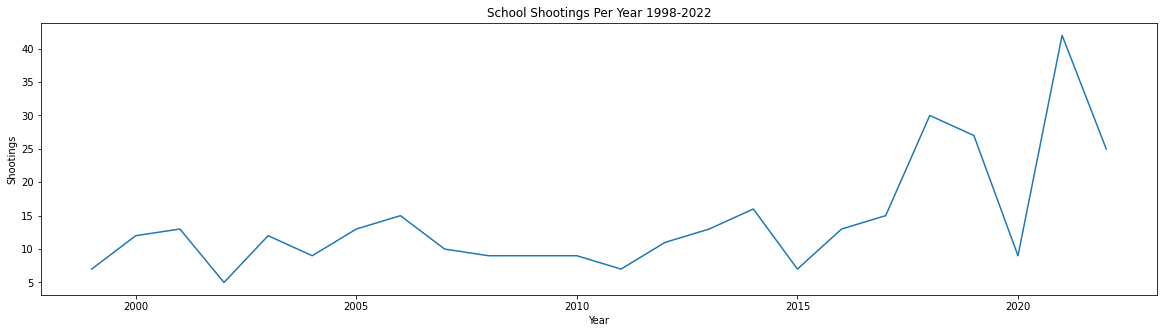

In [172]:
shootings_df['year'].value_counts().to_frame().sort_index(ascending=True).plot(xlabel="Year", ylabel="Shootings", figsize=(20,5), title='School Shootings Per Year 1998-2022', legend=False)

The above graph maps the number of shootings recorded per year. This trend shows an overall increase in shootings with the largest spike taking place in 2021 (42 shootings). The lowest amount of shootings took place in 2002 (5 shootings). This is an extremely significant observation because it shows how there is an upward trend in the number of shootings per year. Therefore, this means that this is a growing issue that needs to be addressed immediately and has yet to be properly resolved. 

### Shootings by Weapon Type

Next, we take a look at the weapons used in the school shootings and compare the most used weapon types to the number of casualties they cause.

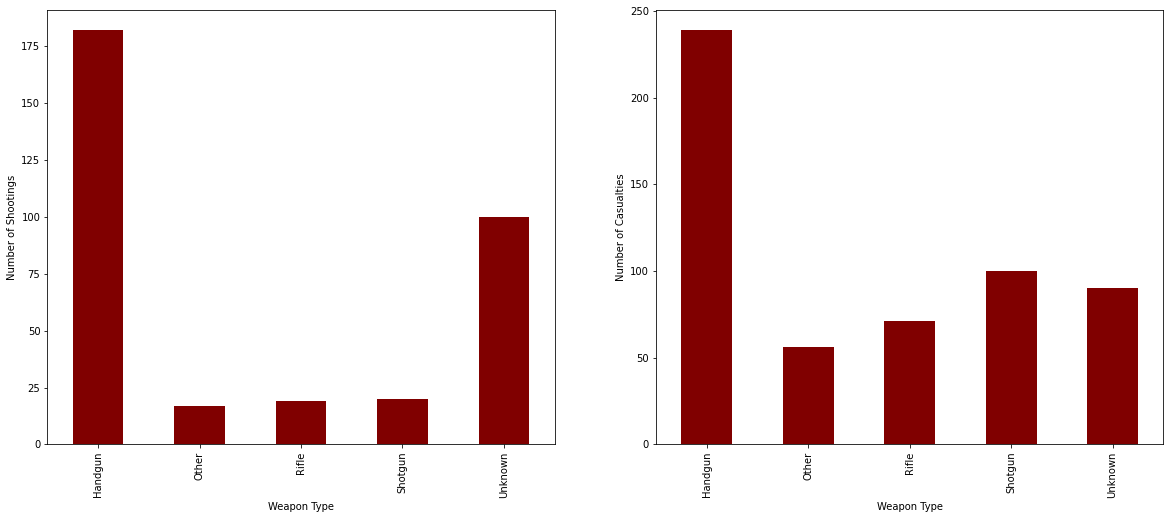

In [173]:
%%capture --no-display
weapons = shootings_df[["weapon", "casualties"]]
weapons.fillna("", inplace=True)

# Simplify the weapon column
weapons["weapon"].loc[weapons["weapon"].str.contains("shotgun")] = "Shotgun" 
weapons["weapon"].loc[weapons["weapon"].str.contains("rifle")] = "Rifle"
weapons["weapon"].loc[weapons["weapon"].str.contains("handgun")] = "Handgun"
weapons["weapon"].loc[weapons["weapon"].str.contains("pistol")] = "Handgun"
weapons["weapon"].loc[weapons["weapon"].str.contains("revolver")] = "Handgun"
weapons["weapon"].loc[weapons["weapon"].__eq__("")] ="Unknown" 
weapons["weapon"].loc[~weapons["weapon"].str.contains("Handgun") & ~weapons["weapon"].str.contains("Rifle") & ~weapons["weapon"].str.contains("Shotgun") & ~weapons["weapon"].str.contains("Unknown")] = "Other"

# Specifies a 1 x 5 grid of plots, figsize in inches
figure, axes = plt.subplots(1, 2, figsize=(20, 8))
weapons.groupby("weapon").count().plot.bar(ylabel="Number of Shootings", xlabel="Weapon Type", color="maroon", legend=False , ax=axes[0])
weapons.groupby("weapon").sum().plot.bar(ylabel="Number of Casualties", xlabel="Weapon Type", color="maroon", legend=False , ax=axes[1])

The left side graph shows us that the handgun was used in the greatest number of shootings. This may explain that a handgun is more attainable than other weapon types. Rifles, shotguns, and other weapon types were very close in the amount of times they were used, meaning they all may be similarly attainable. However, if you look closely the type of weapon that was the most rarely used was the rifle (besides other types). 

On the right hand side, the bar graph shows the number of casualties in relation to weapon type. Here, handguns is also the highest most likely because they were involved in the greatest number of shootings. Shotguns were more responsible for deaths than rifles were. There were also more undocumented/unknown weapon caused deaths than weapons that did not fit into the categories of handgun, rifles, or shotguns (other). 

### Shootings by State and Month

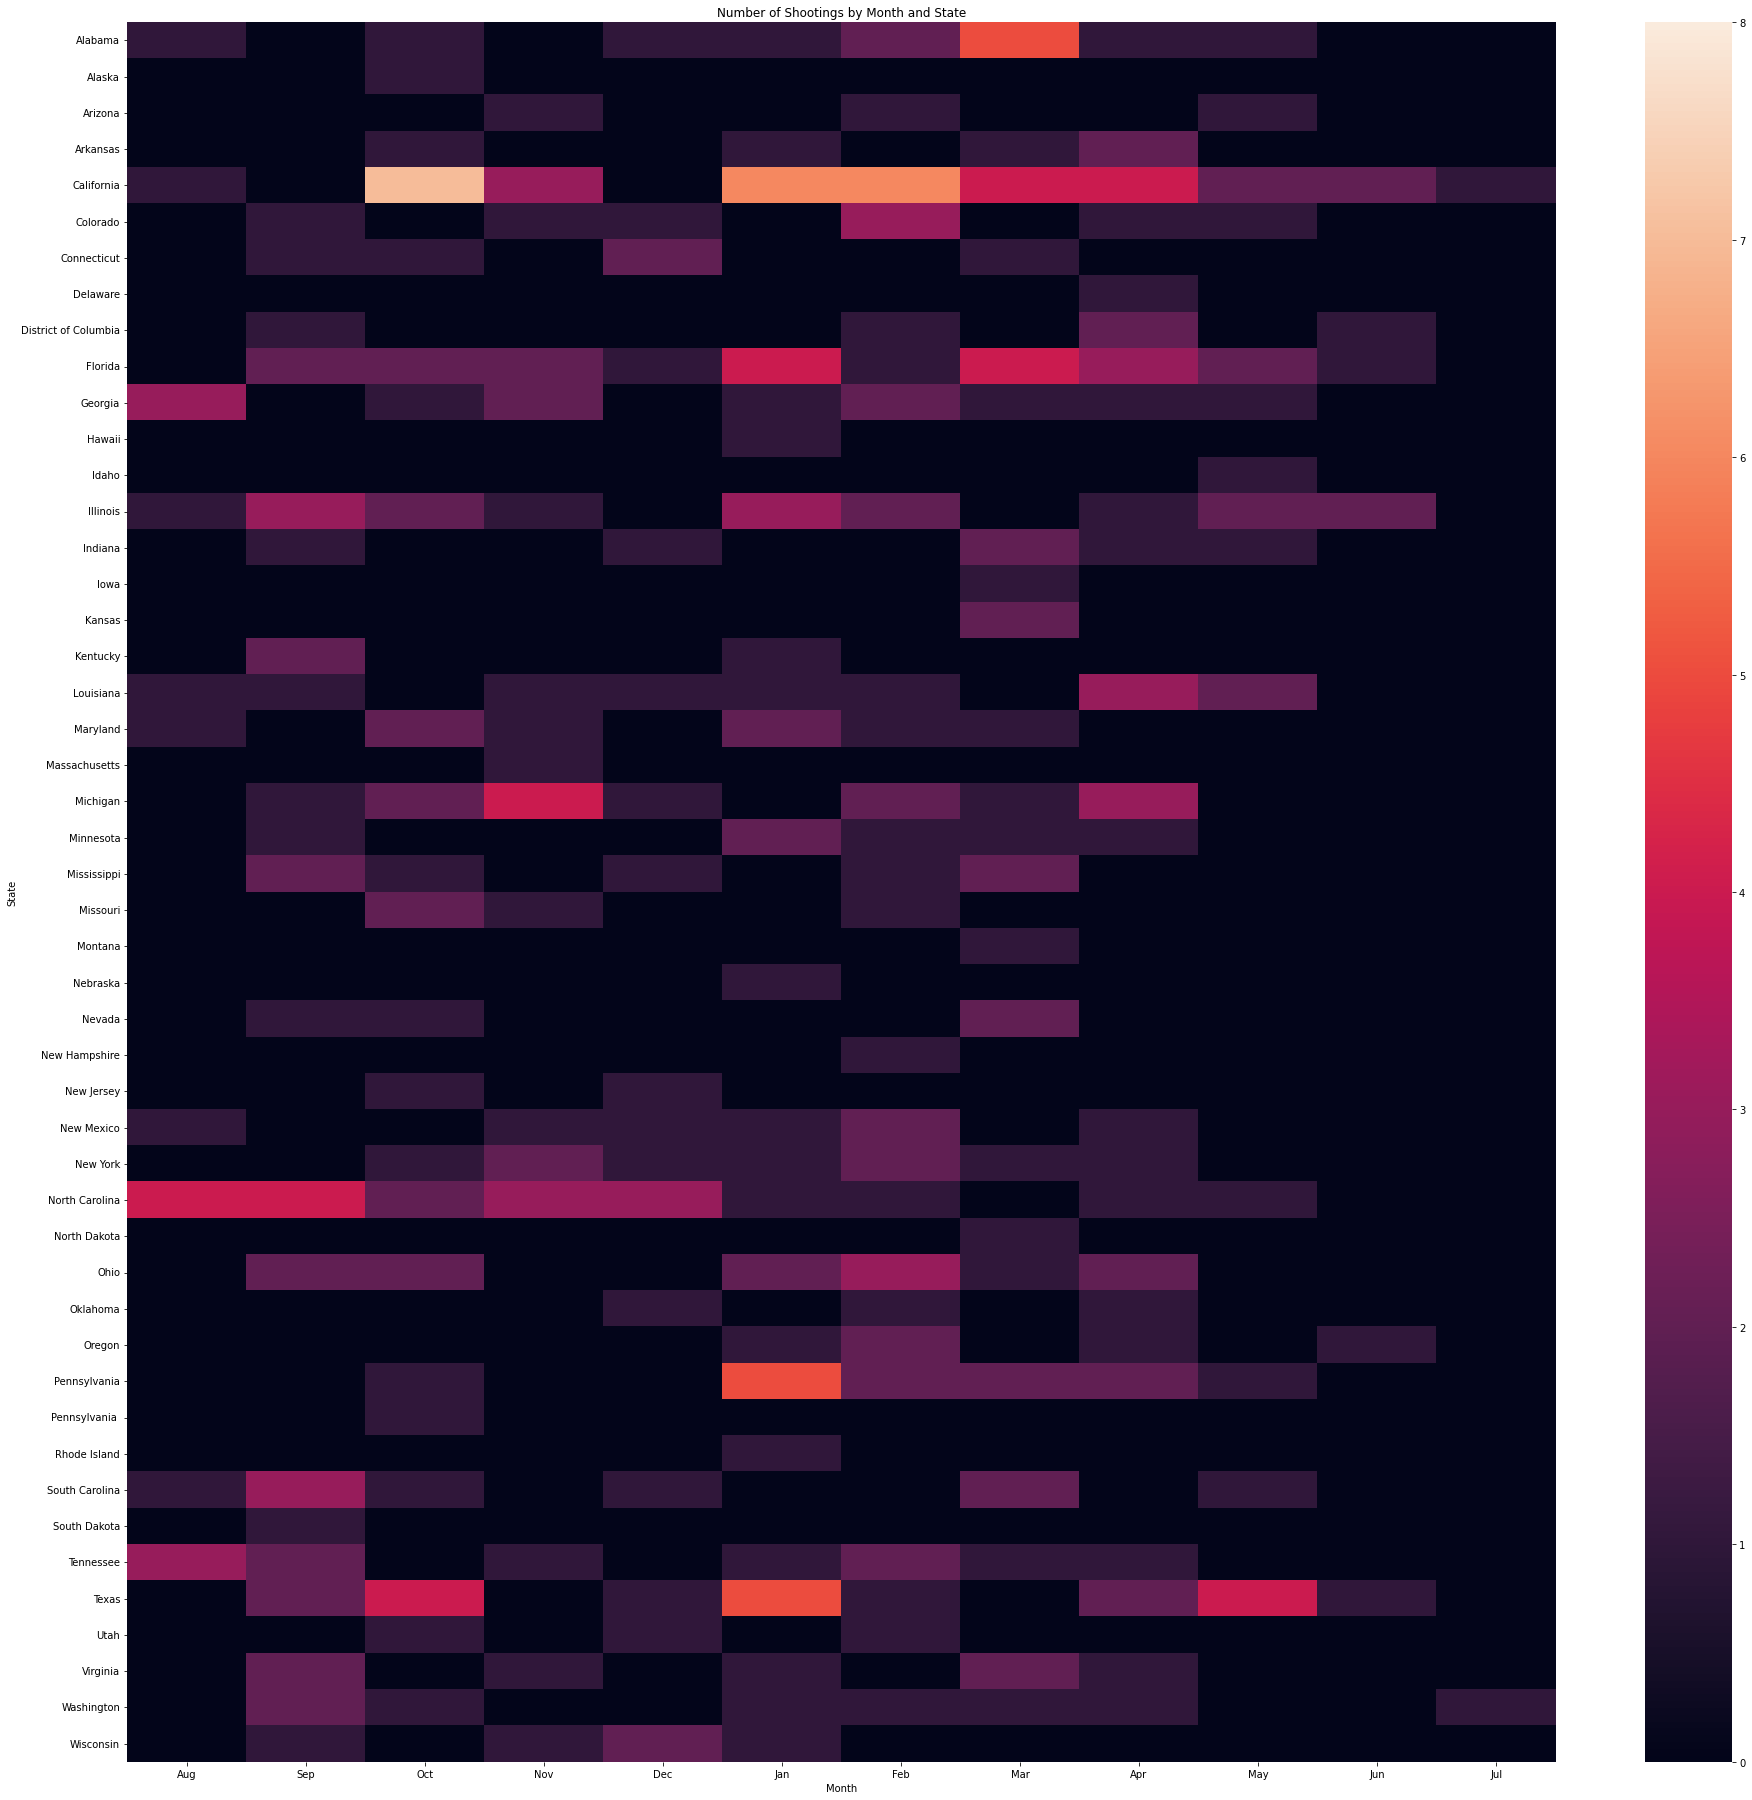

In [174]:
temp = shootings_df[['state', 'date']].copy()
temp['month'] = pd.DatetimeIndex(temp['date']).month #adds month column
temp.drop(columns='date', inplace=True)
month_abv = {'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May', '6': 'Jun', 
             '7': 'Jul', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
temp['month'] = temp['month'].astype(str).map(month_abv) #abbreviate the months 

fig, ax = plt.subplots(figsize=(32,32))  
location_month_df = temp.groupby('state').month.value_counts().to_frame().unstack().fillna(0) #construct dataframe of month to state shootings
location_month_df = location_month_df['month'][['Aug', 'Sep','Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul']] #reorder columns by standard school year 
sns.heatmap(location_month_df, ax=ax, vmin=0, vmax=8) #create heatmap
ax.set_xlabel("Month")
ax.set_ylabel("State")
ax.set_title('Number of Shootings by Month and State')
xticks = ['Aug', 'Sep','Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul']
ax.XData = xticks
plt.show()

This heatmap is a mapping of the number of school shootings in relation to the Month that they occurred in as well as the State. The heatmap ranges in index from 0-8 shootings as this gives a better visual of the data. However, the maximum amount of shootings was in the state of California with a value of 36. Within the state of California, the month with the greatest number of shootings was October. It may be reasonable to consider that California's high population played a factor in it having the greatest number of schootings. There were multiple states that shared a minimum of one shooting. Overall, the month with the highest number of shootings was January and the minimum was July. Looking into the month(s) with the greatest number of shootings can prove critical because this can be a time to focus even further on mental health and support for students.




###Free/Reduced Price Lunch vs. Shootings

Below, we will plot the number of school shootings in relation to the percentage of free and reduced lunch eligible students at a school. We will normalize for the fact that there could be a large number of schools with a high percentage of eligible students.

In [175]:
# get subset of our dataset with relevant information
lunch = all_schools[['lunch','enrollment', 'shooting']].copy()
lunch['pct'] = lunch['lunch'] / lunch['enrollment']

Now we create the bins that we'll use to separate the schools.

In [176]:
range_0 = lunch[lunch['pct'] <= 0.10].copy()
range_1 = lunch[(lunch['pct'] > 0.10) & (lunch['pct'] <= 0.20)].copy()
range_2 = lunch[(lunch['pct'] > 0.20) & (lunch['pct'] <= 0.30)].copy()
range_3 = lunch[(lunch['pct'] > 0.30) & (lunch['pct'] <= 0.40)].copy()
range_4 = lunch[(lunch['pct'] > 0.40) & (lunch['pct'] <= 0.50)].copy()
range_5 = lunch[(lunch['pct'] > 0.50) & (lunch['pct'] <= 0.60)].copy()
range_6 = lunch[(lunch['pct'] > 0.60) & (lunch['pct'] <= 0.70)].copy()
range_7 = lunch[(lunch['pct'] > 0.70) & (lunch['pct'] <= 0.80)].copy()
range_8 = lunch[(lunch['pct'] > 0.80) & (lunch['pct'] <= 0.90)].copy()
range_9 = lunch[(lunch['pct'] > 0.90) & (lunch['pct'] <= 1.0)].copy()

Then we add a column to identify which bin the school is in.

In [177]:
range_0['category'] = '0-10%'
range_1['category'] = '10-20%'
range_2['category'] = '20-30%'
range_3['category'] = '30-40%'
range_4['category'] = '40-50%'
range_5['category'] = '50-60%'
range_6['category'] = '60-70%'
range_7['category'] = '70-80%'
range_8['category'] = '80-90%'
range_9['category'] = '90-100%'

Lastly, we graph the data.

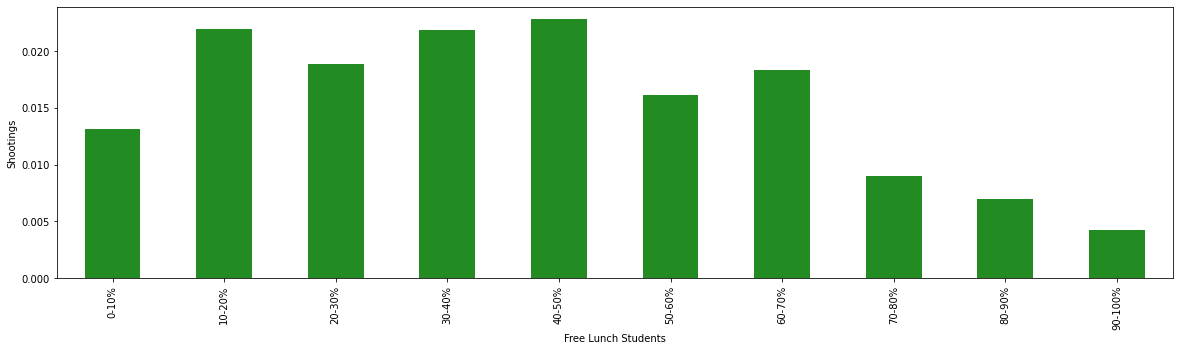

In [178]:
# concatenate the dataframes back together
grouped_ranges = pd.concat([range_0, range_1, range_2, range_3, range_4, range_5, range_6, range_7, range_8, range_9])

# get the amount of schools in each bin that had a shooting divide to represent the amount as a percent of the total schools in the bin.
shootings_in_bin = grouped_ranges[grouped_ranges['shooting'] == 1].category.value_counts()
all_in_bin = grouped_ranges.category.value_counts()
ranges_counts = shootings_in_bin / all_in_bin

# correct the ordering and plot
order = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
ranges_counts = ranges_counts.reindex(order)
ranges_counts.plot.bar(ylabel='Shootings', xlabel='Free Lunch Students', color="forestgreen", figsize=(20,5))

The graph shows the correlation between the percentage of Students who received free or reduced price lunches due to financial reasons and the number of shootings. From analzying the graph, it seems that the percentage of free or reduced lunch students may not be correlated with amount of shootings. At least up until the school reached 70% of students, where the number of shootings drops considerably. This goes against our original hypothesis that schools with more low-income students would have more shootings.

### Race vs. Shootings

The next bar graph will be similar to the last but for the ratio of white students to total students. We focused on this race specifically since a lot of the dialogue around school shootings centers around the race of the people involved.

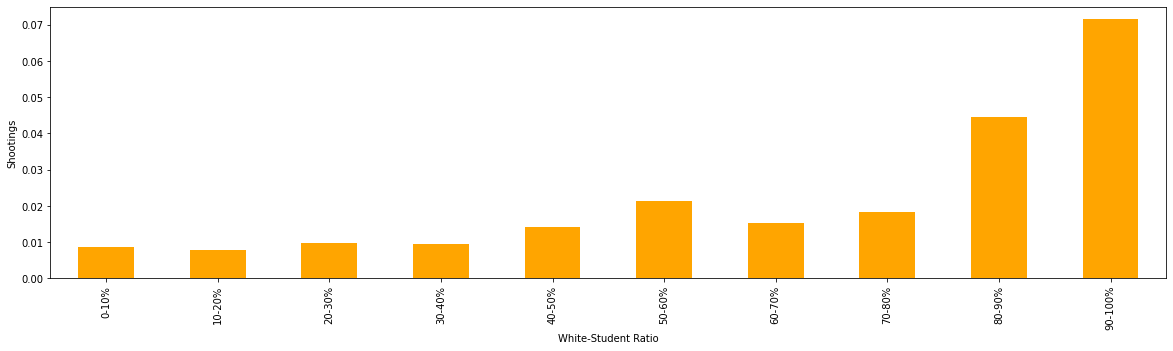

In [179]:
# get subset of our dataset with relevant information
student = all_schools[['white', 'black', 'enrollment', 'shooting']].copy()
student['white_pct'] = student['white'] / student['enrollment']
student['black_pct'] = student['black'] / student['enrollment']

# bin the ratios of white students
range_0 = student[student['white_pct'] <= 0.10].copy()
range_1 = student[(student['white_pct'] > 0.10) & (student['white_pct'] <= 0.20)].copy()
range_2 = student[(student['white_pct'] > 0.20) & (student['white_pct'] <= 0.30)].copy()
range_3 = student[(student['white_pct'] > 0.30) & (student['white_pct'] <= 0.40)].copy()
range_4 = student[(student['white_pct'] > 0.40) & (student['white_pct'] <= 0.50)].copy()
range_5 = student[(student['white_pct'] > 0.50) & (student['white_pct'] <= 0.60)].copy()
range_6 = student[(student['white_pct'] > 0.60) & (student['white_pct'] <= 0.70)].copy()
range_7 = student[(student['white_pct'] > 0.70) & (student['white_pct'] <= 0.80)].copy()
range_8 = student[(student['white_pct'] > 0.80) & (student['white_pct'] <= 0.90)].copy()
range_9 = student[(student['white_pct'] > 0.90) & (student['white_pct'] <= 1.0)].copy()

range_0['category'] = '0-10%'
range_1['category'] = '10-20%'
range_2['category'] = '20-30%'
range_3['category'] = '30-40%'
range_4['category'] = '40-50%'
range_5['category'] = '50-60%'
range_6['category'] = '60-70%'
range_7['category'] = '70-80%'
range_8['category'] = '80-90%'
range_9['category'] = '90-100%'

# concatenate the dataframes back together
grouped_ranges = pd.concat([range_0, range_1, range_2, range_3, range_4, range_5, range_6, range_7, range_8, range_9])

# get the amount of schools in each bin that had a shooting divide to represent the amount as a percent of the total schools in the bin.
shootings_in_bin = grouped_ranges[grouped_ranges['shooting'] == 1].category.value_counts()
all_in_bin = grouped_ranges.category.value_counts()
white_ranges = shootings_in_bin / all_in_bin

# correct the ordering and plot
order = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
white_ranges = white_ranges.reindex(order)

white_ranges.plot.bar(ylabel='Shootings', xlabel='White-Student Ratio', color="orange", figsize=(20,5))

According to the shootings dataset the maximum number of shootings is done by white individuals. Therefore, we took a deeper analysis into the ratio of white student population. This graphs show that there isn't much difference in the number of school shootings based on the percentage of a school's enrollment that is white. Again, however, this changes slightly in the two bins of higher than 80% white students. In this area, the number of shootings is a lot higher. This shows that schools that have a predominately more white population have experienced a greater number of school shootings. 

# Looking Ahead

Going forward, we plan to build models to try to determine if there is some correlation between the student demographics (race, income) and the likeliness of a shooting occuring at a school. We would want to analyze if there are any predictive attributes in order to use that to possibly prevent more shootings.

By analyzing this data efficiently we can better understand the demographics and trends of the data, and compare such data to schools that have not experienced shootings. This is critical to inferring answers to the ultimate question of how can we save lives in the future. 